# Table of Contents
1. Basic Statistics 
## 2. World
3. USA
4. Individual City in USA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import geopandas as gpd
import plotly.express as px
from matplotlib.lines import Line2D
from math import pi

# 2. World

In [2]:
## How many cities across continents are in the data 

# choose year
year = 2022

# importing data with continent information

qol_con = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_original_geo.csv')
qol_con_yr = qol_con.loc[qol_con['Year'] == year]

# counting cities by continent 

num_city_by_continent = pd.DataFrame(qol_con_yr['Continent'].value_counts())
num_city_by_continent.loc['Total'] = num_city_by_continent.sum()
num_city_by_continent.T

,Europe,North America,Asia,Lain America,Oceania,Africa,Total
Continent,91,65,59,24,8,8,255


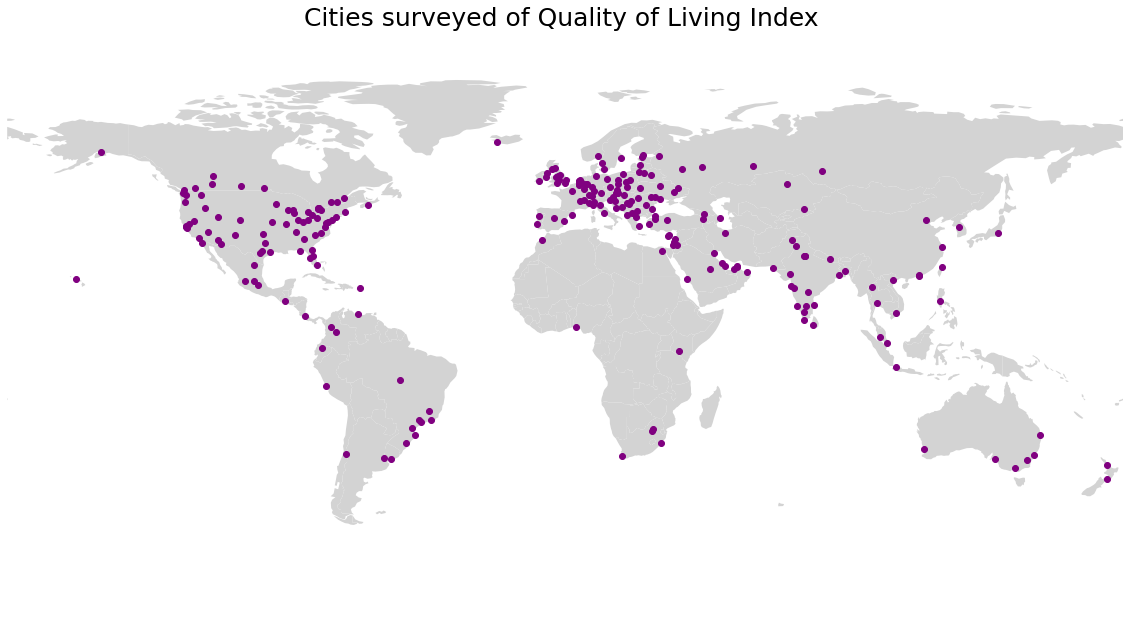

In [3]:
## Depict surveyed cities on the map

# choose year
year = 2022

# importing data
qol_scale = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo.csv')
qol_scale = qol_scale[(qol_scale.Year==year)]

# importing world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world['name']!='Antarctica']

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(20, 15))
world.plot(color='lightgrey', ax=ax)

# Plotting Quality of Life index data
x = qol_scale['Longitude']
y = qol_scale['Latitude']
z = qol_scale['Quality of Life Index']
plt.scatter(x=x, y=y, c='purple')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.title('Cities surveyed of Quality of Living Index \n', fontdict={'fontsize': 25})

# removing outer axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.show()

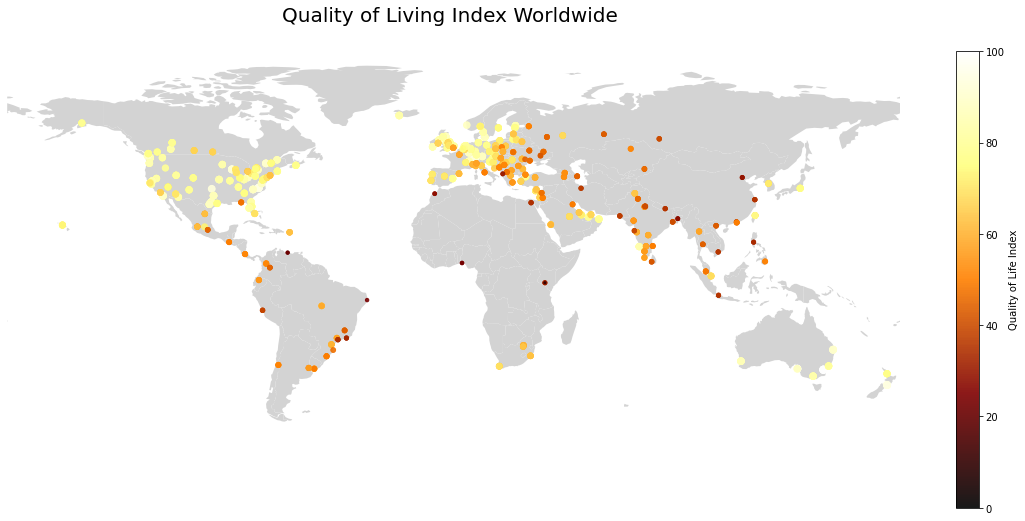

In [4]:
## Dot plot surveyed cities with variable colors on the map

# importing data 
qol_scale = pd.read_csv('../02_data-wrangling/04_data//quality_of_life_index_5yrs_scale_geo.csv')

# importing world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world['name']!='Antarctica']

# creating axes and plotting world map
fig, ax = plt.subplots(figsize=(20, 15))
world.plot(color='lightgrey', ax=ax)

# Plotting Quality of Life index data with a color map
x = qol_scale['Longitude']
y = qol_scale['Latitude']
z = qol_scale['Quality of Life Index']
plt.scatter(x, y, s=0.5*z, c=z, alpha=0.9, vmin=0, vmax=100, cmap='afmhot')
plt.colorbar(label='Quality of Life Index', shrink=.56)

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.title('Quality of Living Index Worldwide \n', fontdict={'fontsize': 20})

# removing outer axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.show()

In [5]:
## How many top cities are in each continent? 

# choose year and lower limit of the ranking you want to observe 
year = 2022
num_rank = 50

# importing data 
qol_scale = pd.read_csv('../02_data-wrangling/04_data//quality_of_life_index_5yrs_original_geo.csv')

# get top num_rank
qol_con = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_original_geo.csv')
qol_con_yr = qol_con.loc[qol_con['Year'] == year]
qol_con_num = qol_con_yr.sort_values(by='Quality of Life Index', ascending=False).head(num_rank)

# counting cities by continent 

num_city_by_continent = pd.DataFrame(qol_con_num['Continent'].value_counts())
num_city_by_continent.loc['Total'] = num_city_by_continent.sum()
num_city_by_continent.T

,North America,Europe,Oceania,Asia,Total
Continent,25,17,7,1,50


In [6]:
## Top cities of each index 

# choose year and index
year = 2022
index_ = 'Quality of Life Index'
num_cities = 10

# importing data 
qol_scale = pd.read_csv('../02_data-wrangling/04_data//quality_of_life_index_5yrs_scale_geo.csv')

# getting the result
qol_scale_yr = qol_scale[qol_scale['Year'] == year]
top_world = qol_scale_yr.sort_values(by=index_, ascending=False).head(num_cities)
top_world = top_world[['City', 'Country', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']].round(decimals=1).set_index('City')
top_world

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Healthcare Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
City,,,,,,,,,,
Raleigh,United States,100.0,82.5,68.8,76.0,57.1,96.7,67.4,89.2,81.3
Canberra,Australia,99.8,58.8,85.3,89.3,50.0,92.2,85.0,99.6,79.9
Adelaide,Australia,98.2,58.3,75.9,86.4,49.5,94.4,84.5,93.7,94.2
Columbus,United States,96.1,86.8,56.4,72.5,55.7,94.9,83.0,84.3,66.6
Zurich,Switzerland,95.8,73.8,93.2,73.1,0.0,87.1,67.1,94.0,78.5
Madison,United States,94.8,75.2,69.4,80.3,57.9,95.8,84.5,92.8,43.6
Austin,United States,94.6,91.0,65.2,66.6,58.6,95.8,64.6,71.5,79.2
Charlotte,United States,93.7,82.9,53.8,73.9,55.4,97.8,63.6,81.3,81.5
Oklahoma City,United States,92.9,72.7,48.3,76.3,60.0,97.1,82.9,89.1,73.9


In [7]:
## Top cities in each continent

# choose criteria
numb_cities = 5  #top5
continent = 'Latin America'

# importing data 
qol_scale = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo.csv')

# display column

dis_col = ['City','Country']

# extracting cities in chosen year and continent

qol_scale = qol_scale.loc[(qol_scale['Year']== year)]
qol_scale = qol_scale.loc[(qol_scale['Continent']== continent)]
qol_scale = qol_scale.sort_values(by='Quality of Life Index', ascending=False).head(numb_cities)

# reset index so that index start from 1
qol_scale.index = np.arange(1, len(qol_scale)+1)
        
qol_scale[dis_col]

,City,Country


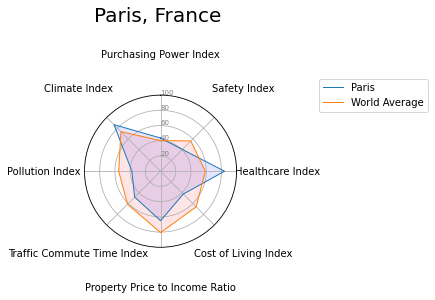

In [8]:
## Radar chart for individual city in the world

# choose city and year
city = 'Paris'
country = 'France'
year = 2022

# importing data

qol = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo.csv')
qol_chosen = qol.loc[(qol['City'] == city) & (qol['Country'] == country) & (qol['Year'] == year)]

# setting variables

categories = ['Purchasing Power Index', 'Safety Index', 'Healthcare Index', 'Cost of Living Index',
                     'Property Price to Income Ratio', 'Traffic Commute Time Index',
                     'Pollution Index','Climate Index']
N = len(categories)


# getting avarage 
qol_yr = qol[qol['Year'] == year]
qol_yr_avg = qol_yr[categories].mean()


# 1: Create background

# the angle of each axis in the plot (divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the plot
ax = plt.subplot(121, polar=True)

# set the first axis to be on top
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60,80,100], ["20","40","60","80","100"], color="grey", size=7)
plt.ylim(0,100)

# 2: Add plots
 
# plot each individual = each line of the data
 
# chosen city
values = qol_chosen[categories].iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"{city}")
ax.fill(angles, values, 'b', alpha=0.1)
 
# average
values = qol_yr_avg.values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="World Average")
ax.fill(angles, values, 'r', alpha=0.1)
 
# add legend
plt.legend(loc='center', bbox_to_anchor=(1.9, 1))

# add title
plt.title(f'{city}, {country} \n', fontsize=20)

# adjust labels
ax.tick_params(axis='both', which='major', pad=30)

plt.show()

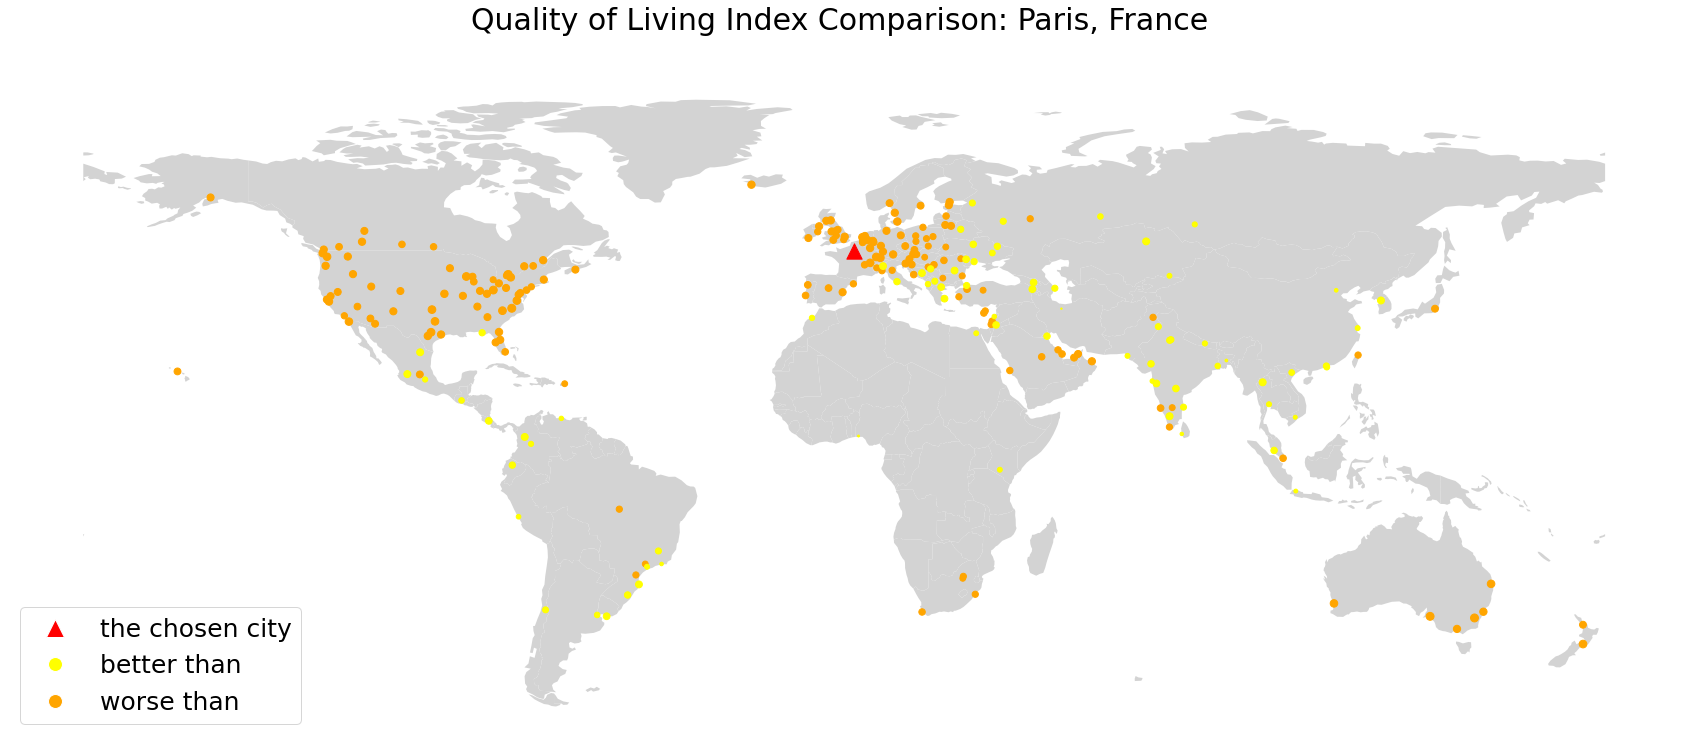

In [9]:
## plotting chosen city on the map with index score higher and lower cities in different colors

# choose criteria
city = 'Paris'
country = 'France'
year = 2022

# importing data 
qol_scale = pd.read_csv("../02_data-wrangling/04_data//quality_of_life_index_5yrs_scale_geo.csv")
qol_scale = qol_scale[qol_scale['Year'] == year]
top_10 = qol_scale.sort_values(by=index_, ascending=False).head(num_cities)

# finding index of the chosen city
chosen_row = qol_scale.loc[(qol_scale['City'] == city) & (qol_scale['Country'] == country) 
              & (qol_scale['Year'] == year)]

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(30, 30))
world.plot(color="lightgrey", ax=ax)

# defining values for scatter plots
df = qol_scale[qol_scale['Year'] == year]

df_higher = df.loc[df['Quality of Life Index'] > chosen_row['Quality of Life Index'].item()]

x_high = df_higher['Longitude']
y_high = df_higher['Latitude']
z_high = df_higher['Quality of Life Index']
sc_high = ax.scatter(x=x_high, y=y_high, s=z_high**0.9, c='orange')

df_lower = df.loc[df['Quality of Life Index'] < chosen_row['Quality of Life Index'].item()]

x_low = df_lower['Longitude']
y_low = df_lower['Latitude'] 
z_low = df_lower['Quality of Life Index']
sc_low = ax.scatter(x=x_low, y=y_low, s=z_low**1, c='yellow')

df_chosen = df.loc[df['Quality of Life Index'] == chosen_row['Quality of Life Index'].item()]

x_chosen = df_chosen['Longitude']
y_chosen = df_chosen['Latitude'] 
z_chosen = df_chosen['Quality of Life Index']
sc = ax.scatter(x=x_chosen, y=y_chosen, s=z_chosen**1.4, c='red', marker='^')

plt.title(f"Quality of Living Index Comparison: {city}, {country} \n", fontdict={'fontsize': 30})

# creating legend
custom_legend = [Line2D([0], [0], marker='^', color='w', markerfacecolor='r', markersize=18),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=14),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=14)]
plt.legend(custom_legend,['the chosen city','better than','worse than'], loc='lower left', prop={'size': 25})

# removing outer axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.show()